In [3]:
import os
import pandas as pd 
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import re
import textstat
from collections import Counter
import language_tool_python
from sklearn.pipeline import Pipeline
import pickle 
import spacy
# Load the English NER model
nlp = spacy.load("en_core_web_sm")
tool = language_tool_python.LanguageTool('en-US')
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from transformers import GPT2LMHeadModel, GPT2Tokenizer, BertForMaskedLM, BertTokenizer
import torch
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix,accuracy_score
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
from sklearn.inspection import permutation_importance

In [5]:
df1 = pd.read_csv("final.csv")
df2 = pd.read_csv("B_G.csv")
combined_df = pd.concat([df1, df2], axis=0)
combined_df = combined_df.dropna()
#splitting the dataset into X and Y
X = combined_df.iloc[:,list(range(2, combined_df.shape[1]))]
Y = combined_df.iloc[:,1]

#splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#loading scaler 
scaler = StandardScaler()

#scaling train dataset
X_train_scaled = scaler.fit_transform(X_train)

#fitting the model 
svm = SVC(kernel='rbf',probability = True, C = 4, gamma= 'scale') 
svm.fit(X_train_scaled, y_train)

SVC(C=4, probability=True)

In [7]:
filename = "model4.pkl"
pickle.dump(svm,open(filename,'wb'))

In [6]:
X_test_scaled = scaler.transform(X_test)
y_pred = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Specificity calculation
specificity = TN / (TN + FP)

# Construct the table
table = [["Metric", "Value"],
         ["Accuracy", accuracy],
         ["Precision", precision],
         ["Recall", recall],
         ["Specificity", specificity],
         ["F1 Score", f1]]
print(tabulate(table, headers="firstrow"))

Metric          Value
-----------  --------
Accuracy     0.993245
Precision    0.992515
Recall       0.994133
Specificity  0.992338
F1 Score     0.993324


C:\Users\PC\AppData\Local\Temp\ipykernel_1348\4259989907.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=size_df, x='Dataset', y='Size', palette='viridis')


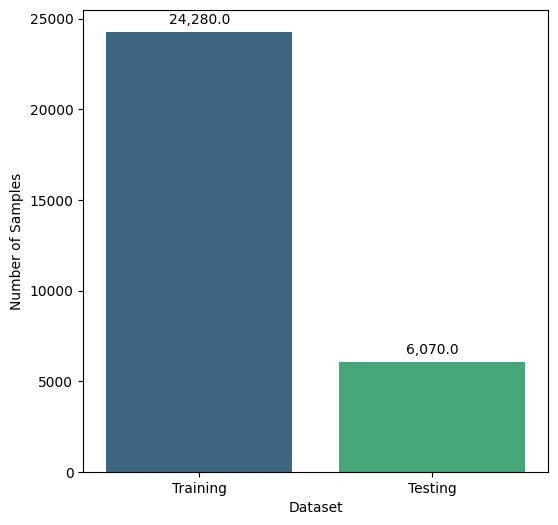

In [7]:
# Create DataFrame for plotting
data_sizes = {
    'Dataset': ['Training', 'Testing'],
    'Size': [X_train.shape[0], X_test.shape[0]]
}
size_df = pd.DataFrame(data_sizes)

plt.figure(figsize=(6, 6))
barplot = sns.barplot(data=size_df, x='Dataset', y='Size', palette='viridis')

# Adding labels
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 9),
        textcoords='offset points'
    )


plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.show()

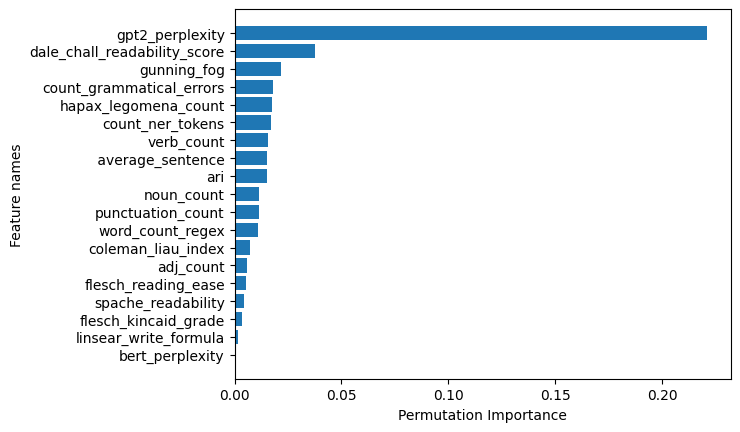

In [8]:
result = permutation_importance(svm, X_test_scaled, y_test, n_repeats=10, random_state=42)

column_names = combined_df.columns.tolist()
feature_names = column_names[2:]
# Plot feature importance
sorted_idx = result.importances_mean.argsort()
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel("Feature names")
plt.show()

In [11]:
cm

array([[2979,   23],
       [  18, 3050]], dtype=int64)

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

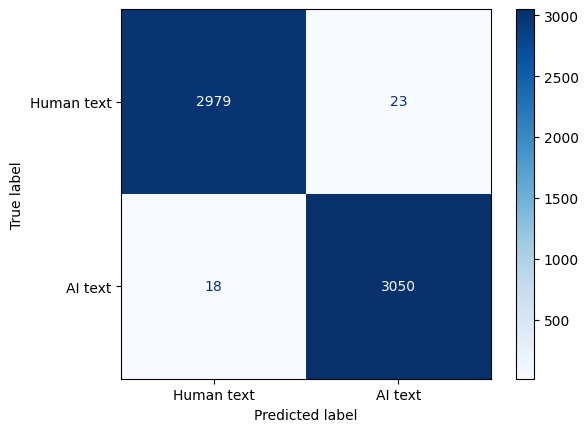

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Human text","AI text"])
disp.plot(cmap=plt.cm.Blues)  # You can change the color map here
plt.show()

In [19]:
y_test.value_counts()

generated
1    3068
0    3002
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score, precision_score

In [11]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted')
}


In [15]:
cv_results = cross_validate(svm, X, Y, cv=kfold, scoring=scoring)

In [16]:
# Calculate average scores
average_accuracy = cv_results['test_accuracy'].mean()
average_f1 = cv_results['test_f1'].mean()
average_recall = cv_results['test_recall'].mean()
average_precision = cv_results['test_precision'].mean()

print(f"Average Accuracy: {average_accuracy}")
print(f"Average F1 Score: {average_f1}")
print(f"Average Recall: {average_recall}")
print(f"Average Precision: {average_precision}")

Average Accuracy: 0.9704118616144974
Average F1 Score: 0.9704110051848428
Average Recall: 0.9704118616144974
Average Precision: 0.9704232627277232
